## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
poll = pd.read_csv('poll.csv')

In [6]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [11]:
poll['vote'].value_counts()

Brown    511
Green    489
Name: vote, dtype: int64

In [12]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) > brown, 'Brown', 'Green')})

In [15]:
sample(0.51).vote.value_counts(normalize=True)

Green    0.512
Brown    0.488
Name: vote, dtype: float64

In [16]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [17]:
dist.head()

,Green,Brown
vote,0.501,0.499
vote,0.525,0.475
vote,0.503,0.497
vote,0.494,0.506
vote,0.504,0.496


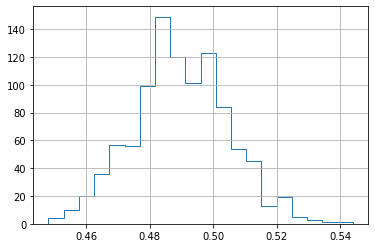

In [18]:
dist.Brown.hist(histtype='step', bins=20)

In [21]:
def samplingdist(brown, n= 1000):
    return pd.DataFrame([sample(brown, n).vote.value_counts(normalize=True) for i in range(n)])

def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [27]:
quantiles(0.75)

(0.223, 0.278)